In [1]:
% define a time window
t = 0:.001:.25;

In [2]:
% make two sine waves
sine1 = sin(2*pi*50*t);
sine2 = sin(2*pi*120*t);

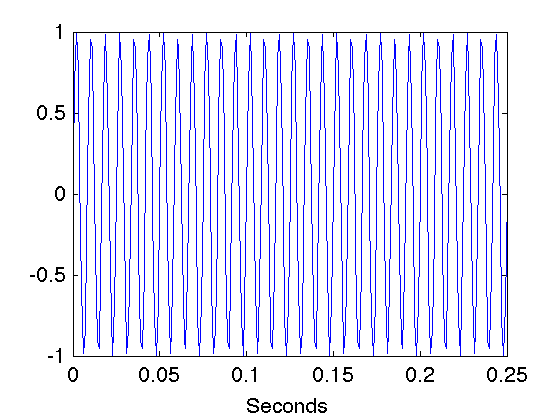

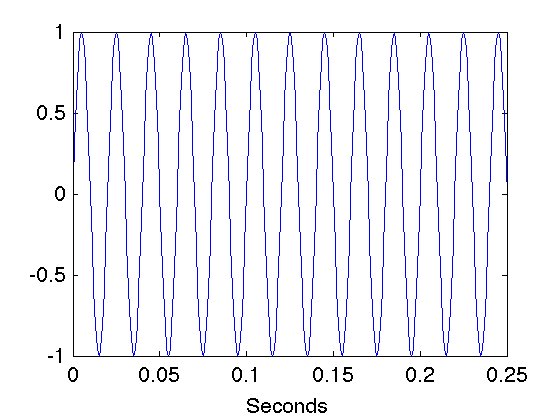

In [3]:
figure; plot(t,sine1); xlabel('Seconds')
figure; plot(t,sine2); xlabel('Seconds')

In [4]:
% Take a moment to figure out what the frequency of these sine waves is

% Hint: remember that frequency is measured in Hz.

In [6]:
% play sine1
sound(sine1)

In [7]:
% play sine2
sound(sine2)

In [8]:
% build a complex sound by adding sine1 and sine2
complex_sound = sine1 + sine2;

In [9]:

% Take a moment to think about what you might expect this wave to look like


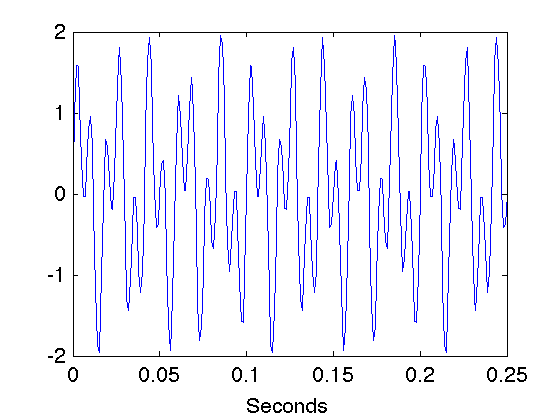

In [11]:
% plot complex_sound
figure; plot(t,complex_sound); xlabel('Seconds')

In [12]:
% play complex_sound
sound(complex_sound)

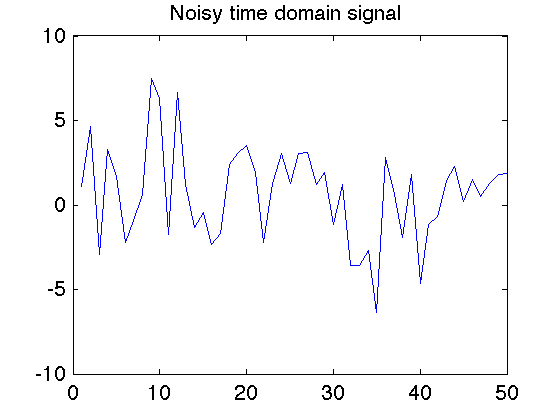

In [13]:
% add some random noise to complex_sound

noisy_sound = complex_sound + 2*randn(size(t));
figure; plot(noisy_sound(1:50))
title('Noisy time domain signal')

In [14]:
sound(noisy_sound)

In [15]:
Y = fft(noisy_sound,251);
Y2 = fft(complex_sound,251);

% for lots more about Fourier transforms, try here: 
% http://nautil.us/blog/the-math-trick-behind-mp3s-jpegs-and-homer-simpsons-face

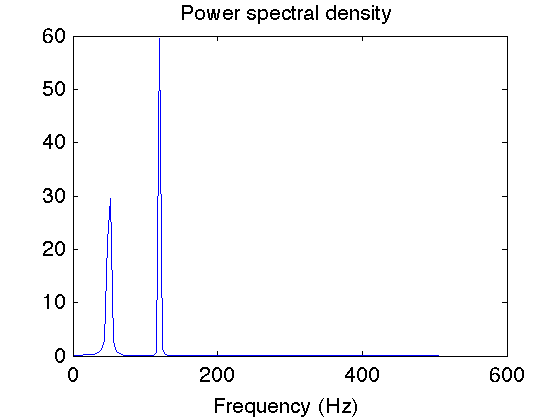

In [16]:
% Spectral density for complex_sound

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y2.*conj(Y2)/251;
f = 1000/251*(0:127);
figure; plot(f,Pyy(1:128))
title('Power spectral density')
xlabel('Frequency (Hz)')

%%

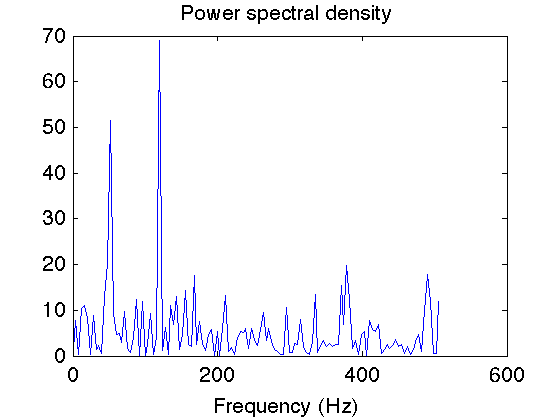

In [17]:
% Spectral density for noisy_sound

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y.*conj(Y)/251;
f = 1000/251*(0:127);
figure; plot(f,Pyy(1:128))
title('Power spectral density')
xlabel('Frequency (Hz)')

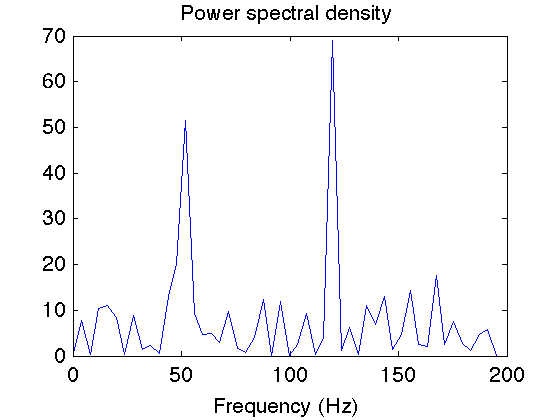

In [18]:
%%
% Zoom in to plot up to 200 Hz
figure; plot(f(1:50),Pyy(1:50))
title('Power spectral density')
xlabel('Frequency (Hz)')

In [19]:
clear all

In [20]:
% Let's try with a *real* phoneme!

[Y_a, Fs_a] = audioread('vowel_a.wav');

In [21]:
sound(Y_a, Fs_a);

In [22]:
% Let's add another!

[Y_i, Fs_i] = audioread('vowel_i.wav');

In [23]:
sound(Y_i, Fs_i);

In [24]:
len = length(Y_a);
Y = fft(Y_a,len);

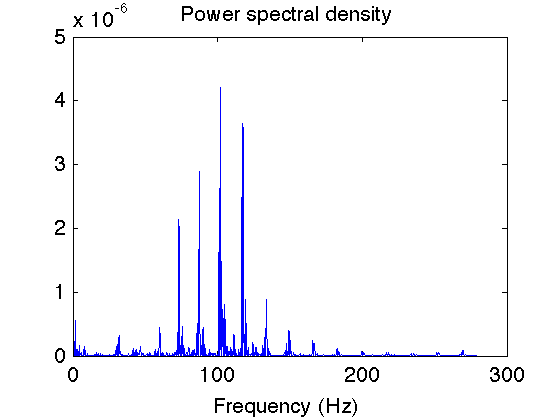

In [25]:
% Spectral density for "a"

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y_a.*conj(Y_a)/len;
f = 1000/len*(0:8000);
figure; plot(f,Pyy(1:8001)); 
title('Power spectral density')
xlabel('Frequency (Hz)')

In [26]:
len_i = length(Y_i);
Y = fft(Y_i,len);

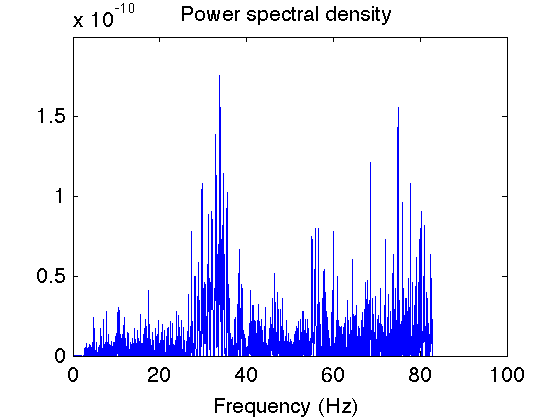

In [27]:
% Spectral density for "i"

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y_i.*conj(Y_i)/len_i;
f = 1000/len_i*(0:8000);
figure; plot(f,Pyy(1:8001));
title('Power spectral density')
xlabel('Frequency (Hz)')